In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5), (0.5))
#     ])

transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)

In [5]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


## Define the Autoencoder class

In [28]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # N, 784 - N batch size, 784 - original image size of 28*28
        # aim is to encode this into linear sequential model of size 128 
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),  ### original image is reduced to a reduced representative matrix i.e., N, 784 -> N,128
            nn.ReLU(), 
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3) # N, 3
        )

        self.decoder = nn.Sequential(
                    nn.Linear(3, 12),
                    nn.ReLU(),
                    nn.Linear(12, 64),
                    nn.ReLU(),
                    nn.Linear(64, 128),
                    nn.ReLU(),
                    nn.Linear(128, 28 * 28),
                    nn.Sigmoid()
        )

        # self.decoder = nn.Sequential(
        #             nn.Linear(3, 12),
        #             nn.ReLU(),
        #             nn.Linear(12, 64),
        #             nn.ReLU(),
        #             nn.Linear(64, 128),
        #             nn.ReLU(),
        #             nn.Linear(128, 28 * 28),
        #             nn.Sigmoid()
        #         )
            
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [29]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

## Training the ML model

In [31]:
num_epochs = 10 
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        # convert a 28*28 image to a 784 rows without loosing any information
        img = img.reshape(-1, 28 * 28)
        # reconstruct the image based on the autoencoder model defined earlier
        recon = model(img)
        # compare the MSE loss between model output and original data 
        loss = criterion(recon, img)
        # optimizer conditioned 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, Loss: {loss.item(): .4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss:  0.0390
Epoch: 2, Loss:  0.0402
Epoch: 3, Loss:  0.0338
Epoch: 4, Loss:  0.0418
Epoch: 5, Loss:  0.0334
Epoch: 6, Loss:  0.0349
Epoch: 7, Loss:  0.0338
Epoch: 8, Loss:  0.0425
Epoch: 9, Loss:  0.0383
Epoch: 10, Loss:  0.0301


## plot the reconstructed images

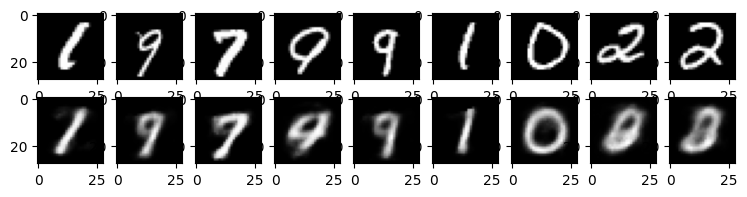

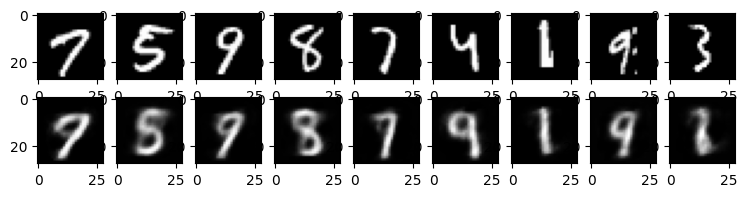

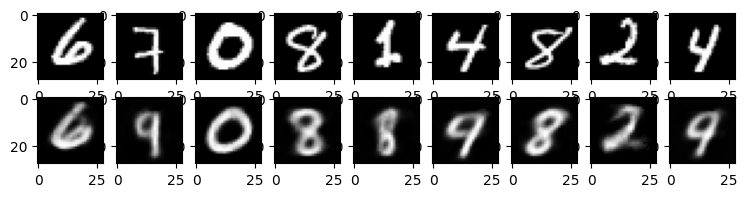

In [33]:
for k in range(0, num_epochs, 4): 
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >=9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])
    for i, item in enumerate(recon):
        if i>=9: break
        plt.subplot(2, 9, 9+i+1) # row length +i+1
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])
